<a href="https://www.kaggle.com/code/lalit7881/50k-bug-prediction-24-82-accuracy?scriptVersionId=295659747" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50k-bug-dataset/bug_dataset_50k.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/50k-bug-dataset/bug_dataset_50k.csv")

In [3]:
df.head()

,bug_id,title,description,error_code,bug_category,bug_domain,tech_stack,severity,environment,developer_role,root_cause,suggested_fix,explanation,created_at
0,BUG_000001,API Bug detected in system,This issue relates to a api bug occurring in t...,403.0,API Bug,Mobile,Spring Boot,High,Development,Full-Stack Developer,Misconfiguration or logic issue related to api...,Review and fix the api bug according to best p...,This bug requires a full-stack developer due t...,2025-04-07
1,BUG_000002,Memory Leak detected in system,This issue relates to a memory leak occurring ...,500.0,Memory Leak,Data,GCP,Medium,Production,Backend Developer,Misconfiguration or logic issue related to mem...,Review and fix the memory leak according to be...,This bug requires a backend developer due to i...,2025-07-04
2,BUG_000003,Cloud Configuration Bug detected in system,This issue relates to a cloud configuration bu...,404.0,Cloud Configuration Bug,DevOps,Django,Medium,Production,Mobile Developer,Misconfiguration or logic issue related to clo...,Review and fix the cloud configuration bug acc...,This bug requires a mobile developer due to it...,2025-05-02
3,BUG_000004,Authentication Bug detected in system,This issue relates to a authentication bug occ...,404.0,Authentication Bug,Backend Systems,Flask,Medium,Production,Mobile Developer,Misconfiguration or logic issue related to aut...,Review and fix the authentication bug accordin...,This bug requires a mobile developer due to it...,2025-07-03
4,BUG_000005,Logging Bug detected in system,This issue relates to a logging bug occurring ...,503.0,Logging Bug,Mobile,Flask,High,Staging,Backend Developer,Misconfiguration or logic issue related to log...,Review and fix the logging bug according to be...,This bug requires a backend developer due to i...,2025-09-09


In [4]:
df.tail()

,bug_id,title,description,error_code,bug_category,bug_domain,tech_stack,severity,environment,developer_role,root_cause,suggested_fix,explanation,created_at
49995,BUG_049996,CI/CD Bug detected in system,This issue relates to a ci/cd bug occurring in...,500.0,CI/CD Bug,DevOps,Vue,Critical,Staging,Security Engineer,Misconfiguration or logic issue related to ci/...,Review and fix the ci/cd bug according to best...,This bug requires a security engineer due to i...,2025-11-17
49996,BUG_049997,Memory Leak detected in system,This issue relates to a memory leak occurring ...,500.0,Memory Leak,Web Development,MySQL,High,Production,Frontend Developer,Misconfiguration or logic issue related to mem...,Review and fix the memory leak according to be...,This bug requires a frontend developer due to ...,2025-11-18
49997,BUG_049998,Database Bug detected in system,This issue relates to a database bug occurring...,403.0,Database Bug,Data,AWS,Low,Production,Data Engineer,Misconfiguration or logic issue related to dat...,Review and fix the database bug according to b...,This bug requires a data engineer due to its n...,2025-09-26
49998,BUG_049999,Authentication Bug detected in system,This issue relates to a authentication bug occ...,404.0,Authentication Bug,Cloud,AWS,High,Development,Security Engineer,Misconfiguration or logic issue related to aut...,Review and fix the authentication bug accordin...,This bug requires a security engineer due to i...,2025-05-03
49999,BUG_050000,Logging Bug detected in system,This issue relates to a logging bug occurring ...,401.0,Logging Bug,Web Development,MySQL,Medium,Production,Frontend Developer,Misconfiguration or logic issue related to log...,Review and fix the logging bug according to be...,This bug requires a frontend developer due to ...,2025-05-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bug_id          50000 non-null  object 
 1   title           50000 non-null  object 
 2   description     50000 non-null  object 
 3   error_code      43812 non-null  float64
 4   bug_category    50000 non-null  object 
 5   bug_domain      50000 non-null  object 
 6   tech_stack      50000 non-null  object 
 7   severity        50000 non-null  object 
 8   environment     50000 non-null  object 
 9   developer_role  50000 non-null  object 
 10  root_cause      50000 non-null  object 
 11  suggested_fix   50000 non-null  object 
 12  explanation     50000 non-null  object 
 13  created_at      50000 non-null  object 
dtypes: float64(1), object(13)
memory usage: 5.3+ MB


In [6]:
df.describe()

,error_code
count,43812.000000
mean,445.129394
std,49.398821
min,400.000000
25%,401.000000
50%,404.000000
75%,502.000000
max,503.000000


In [7]:
df.isnull().sum()

bug_id               0
title                0
description          0
error_code        6188
bug_category         0
bug_domain           0
tech_stack           0
severity             0
environment          0
developer_role       0
root_cause           0
suggested_fix        0
explanation          0
created_at           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

bug_id             object
title              object
description        object
error_code        float64
bug_category       object
bug_domain         object
tech_stack         object
severity           object
environment        object
developer_role     object
root_cause         object
suggested_fix      object
explanation        object
created_at         object
dtype: object

In [10]:
df.shape

(50000, 14)

In [11]:
df.nunique()

bug_id            50000
title                16
description          16
error_code            7
bug_category         16
bug_domain            6
tech_stack           16
severity              4
environment           3
developer_role        9
root_cause           16
suggested_fix        16
explanation           9
created_at          366
dtype: int64

In [12]:
df.columns

Index(['bug_id', 'title', 'description', 'error_code', 'bug_category',
       'bug_domain', 'tech_stack', 'severity', 'environment', 'developer_role',
       'root_cause', 'suggested_fix', 'explanation', 'created_at'],
      dtype='object')

## Data visualizations

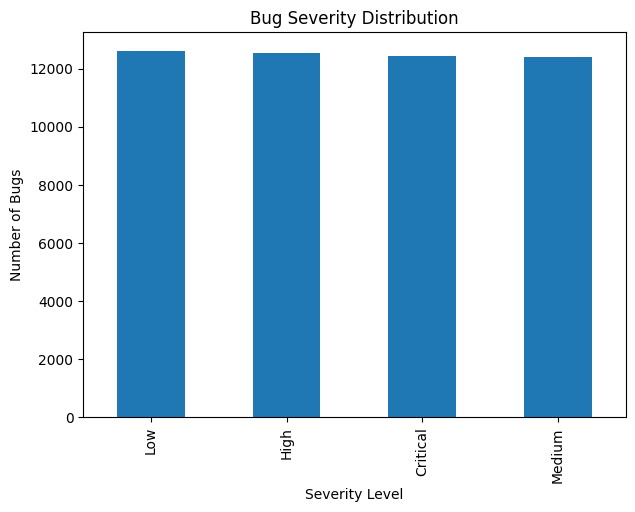

In [13]:
plt.figure(figsize=(7,5))
df['severity'].value_counts().plot(kind='bar')
plt.title("Bug Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Bugs")
plt.show()


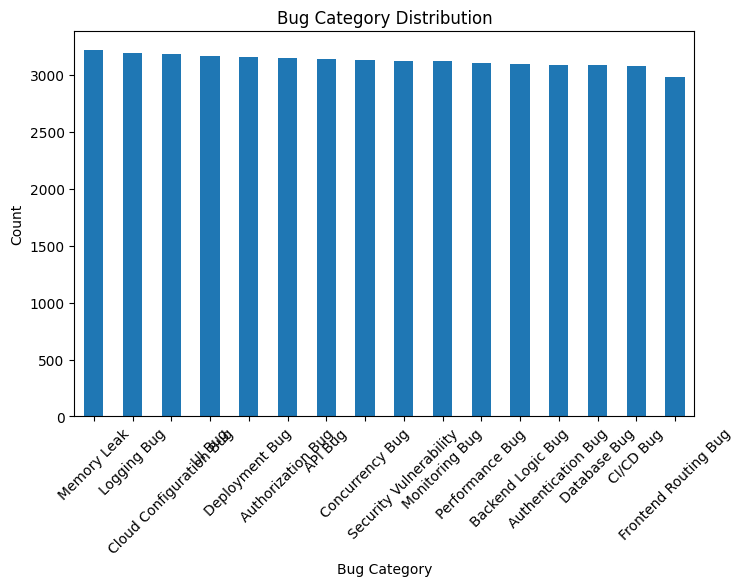

In [14]:
plt.figure(figsize=(8,5))
df['bug_category'].value_counts().plot(kind='bar')
plt.title("Bug Category Distribution")
plt.xlabel("Bug Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


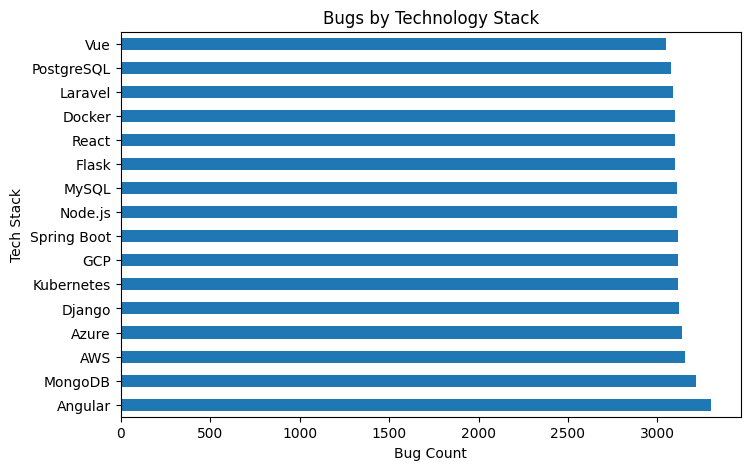

In [15]:
plt.figure(figsize=(8,5))
df['tech_stack'].value_counts().plot(kind='barh')
plt.title("Bugs by Technology Stack")
plt.xlabel("Bug Count")
plt.ylabel("Tech Stack")
plt.show()


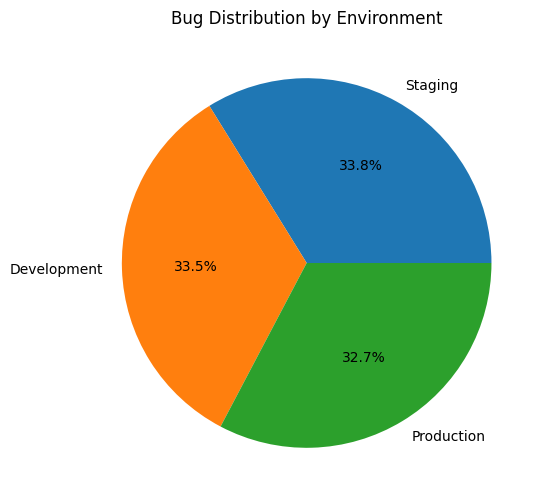

In [16]:
plt.figure(figsize=(6,6))
df['environment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Bug Distribution by Environment")
plt.ylabel("")
plt.show()


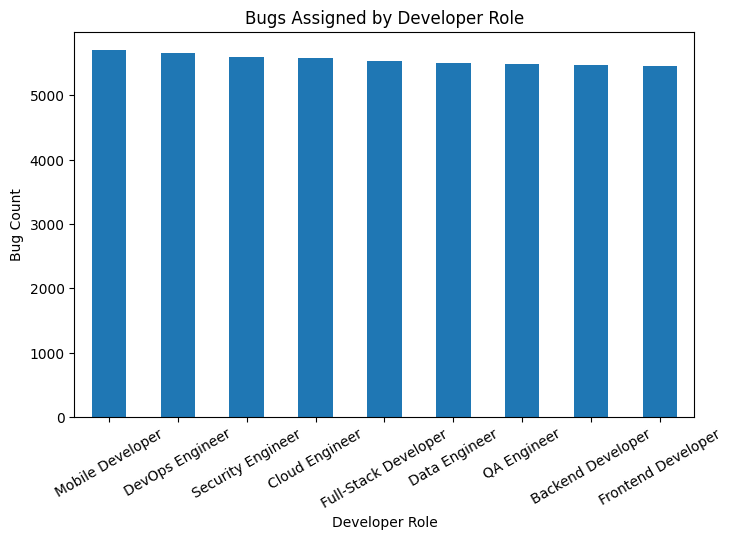

In [17]:
plt.figure(figsize=(8,5))
df['developer_role'].value_counts().plot(kind='bar')
plt.title("Bugs Assigned by Developer Role")
plt.xlabel("Developer Role")
plt.ylabel("Bug Count")
plt.xticks(rotation=30)
plt.show()


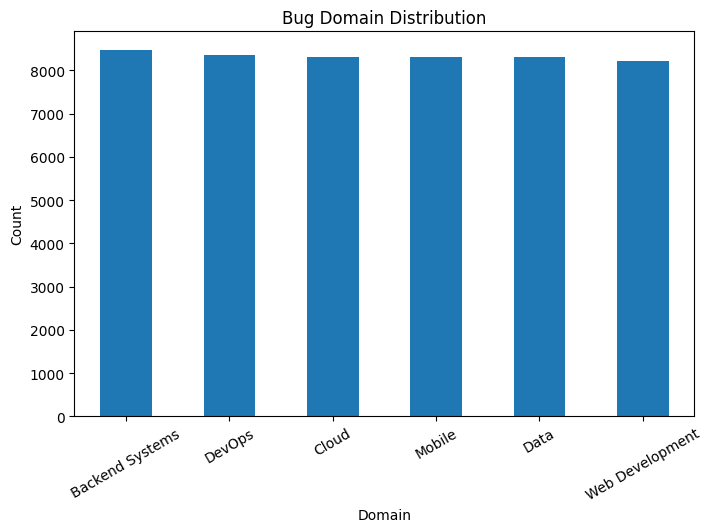

In [18]:
plt.figure(figsize=(8,5))
df['bug_domain'].value_counts().plot(kind='bar')
plt.title("Bug Domain Distribution")
plt.xlabel("Domain")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


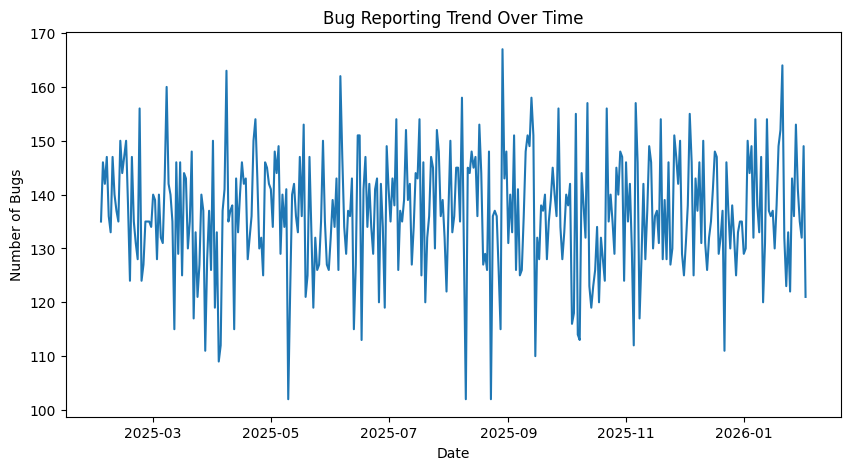

In [19]:
df['created_at'] = pd.to_datetime(df['created_at'])

plt.figure(figsize=(10,5))
df.groupby(df['created_at'].dt.date).size().plot()
plt.title("Bug Reporting Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bugs")
plt.show()


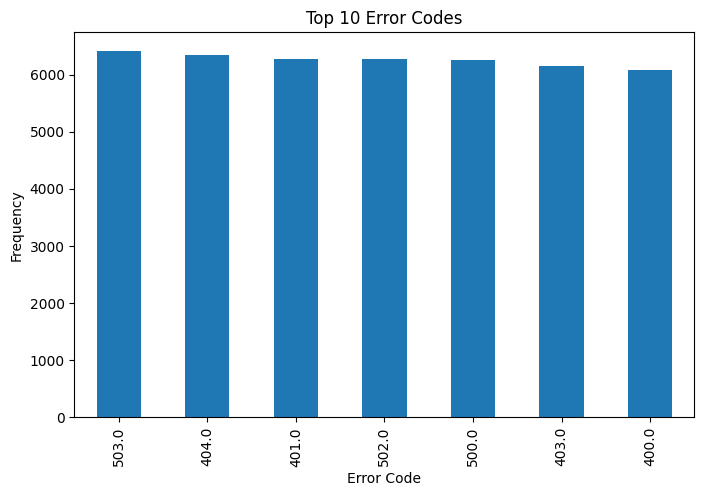

In [20]:
plt.figure(figsize=(8,5))
df['error_code'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Error Codes")
plt.xlabel("Error Code")
plt.ylabel("Frequency")
plt.show()


<Figure size 800x500 with 0 Axes>

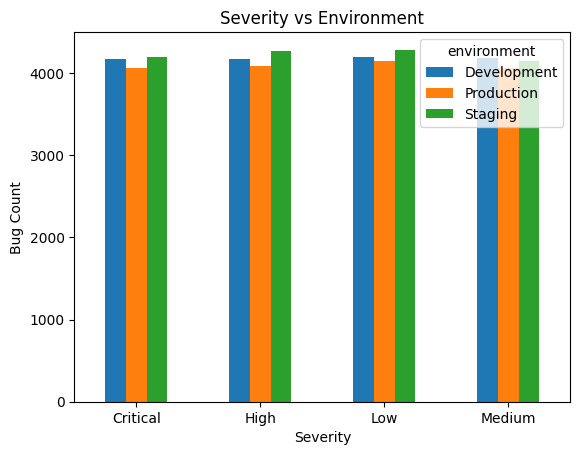

In [21]:
severity_env = pd.crosstab(df['severity'], df['environment'])

plt.figure(figsize=(8,5))
severity_env.plot(kind='bar')
plt.title("Severity vs Environment")
plt.xlabel("Severity")
plt.ylabel("Bug Count")
plt.xticks(rotation=0)
plt.show()


## Feature engg

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

from scipy.sparse import hstack

import xgboost as xgb

In [23]:
le = LabelEncoder()
y = le.fit_transform(df['severity'])

num_classes = len(np.unique(y))
print("Number of classes:", num_classes)


Number of classes: 4


In [24]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1,2)
)

X_text = tfidf.fit_transform(
    df['title'] + " " + df['description']
)

print(X_text.shape)  # sanity check


(50000, 73)


In [25]:
cat_cols = [
    'bug_category',
    'bug_domain',
    'tech_stack',
    'environment',
    'developer_role',
    'error_code'
]

df_cat = df[cat_cols].copy()
df_cat['error_code'] = df_cat['error_code'].fillna('Unknown').astype(str)

X_cat = pd.get_dummies(df_cat, drop_first=True)


In [26]:
X = hstack([X_text, X_cat.values])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [28]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test, label=y_test)


In [29]:
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'eval_metric': 'mlogloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'tree_method': 'hist',
    'seed': 42
}



In [30]:
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200
)


In [31]:
y_pred = xgb_model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred) * 100
print("XGBoost Accuracy:", round(accuracy, 2), "%")


XGBoost Accuracy: 24.82 %


## Thank you..pls upvote!!